 # EPL Prediction 2018

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display

In [6]:
from glob import glob

#Function to concat all the csv files into one file
def concat(outfile = 'concat-season0119.csv'): #outfile = "name of the output file"
    filenames = glob('./dataset/season*.csv') #many filenames have similar pattern 
    dataframes = []
    for files in filenames:
        dataframes.append(pd.read_csv(files))
    concatDF = pd.concat(dataframes, axis=0) #axis=0 to concat vertically 
    concatDF.to_csv('./dataset/'+ outfile, index = None) #index=None for no indexing
    
concat() #concat function call
    
data = pd.read_csv('./dataset/concat-season0119.csv')
display(data.head())


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,15/08/09,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,...,5,7,15,14,4,6,2,2,0,0
1,15/08/09,Blackburn,Man City,0,2,A,0,1,A,M Dean,...,9,5,12,9,5,4,2,1,0,0
2,15/08/09,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,...,3,13,16,10,4,7,2,1,0,0
3,15/08/09,Chelsea,Hull,2,1,H,1,1,D,A Wiley,...,12,3,13,15,12,4,1,2,0,0
4,15/08/09,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,5,9,11,13,4,9,0,0,0,0


In [61]:
read_team_names = pd.read_csv('./dataset/season-1819.csv')
display(read_team_names.head())

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,10/08/18,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,6,4,11,8,2,5,2,1,0,0
1,11/08/18,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,4,1,11,9,7,4,1,1,0,0
2,11/08/18,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,6,9,9,11,5,5,1,2,0,0
3,11/08/18,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,1,4,9,8,2,5,2,1,0,0
4,11/08/18,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,2,5,11,12,3,5,2,2,0,0


In [62]:
team_name_list = read_team_names['HomeTeam']
team_name=[]
for teams in team_name_list:
    if teams not in team_name:
        team_name.append(teams)
print("\n\nTeams in Season: 2018-2019")
display(team_name)



Teams in Season 2018-2019


['Man United',
 'Bournemouth',
 'Fulham',
 'Huddersfield',
 'Newcastle',
 'Watford',
 'Wolves',
 'Arsenal',
 'Liverpool',
 'Southampton',
 'Cardiff',
 'Chelsea',
 'Everton',
 'Leicester',
 'Tottenham',
 'West Ham',
 'Brighton',
 'Burnley',
 'Man City',
 'Crystal Palace']

In [67]:
#Exporting Team Names in CSV file
teams_data_frame = pd.DataFrame(team_name, columns=["Team Names"])
display(teams_data_frame)
# teams_data_frame.to_csv('./dataset/Teams.csv', index=None)

,Team Names
0,Man United
1,Bournemouth
2,Fulham
3,Huddersfield
4,Newcastle
5,Watford
6,Wolves
7,Arsenal
8,Liverpool
9,Southampton


In [64]:
#print
print(teams_data_frame[teams_data_frame['Team Names'] == "Man United"])

   Team Names
0  Man United


In [65]:
#print
print(teams_data_frame[teams_data_frame['Team Names'] == "Brighton"])

   Team Names
16   Brighton


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 22 columns):
Date        3550 non-null object
HomeTeam    3550 non-null object
AwayTeam    3550 non-null object
FTHG        3550 non-null int64
FTAG        3550 non-null int64
FTR         3550 non-null object
HTHG        3550 non-null int64
HTAG        3550 non-null int64
HTR         3550 non-null object
Referee     3550 non-null object
HS          3550 non-null int64
AS          3550 non-null int64
HST         3550 non-null int64
AST         3550 non-null int64
HF          3550 non-null int64
AF          3550 non-null int64
HC          3550 non-null int64
AC          3550 non-null int64
HY          3550 non-null int64
AY          3550 non-null int64
HR          3550 non-null int64
AR          3550 non-null int64
dtypes: int64(16), object(6)
memory usage: 610.2+ KB


In [95]:
def getTeamData(teamName):
    #Num of goals in wins and looses
    gamesHome = data[data['HomeTeam']== teamName]
    totalGoalsScored = gamesHome['FTHG'].sum()
    
    gamesAway = data[data['AwayTeam'] == teamName]
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)
    totalGoalsScored += gamesAway['FTAG'].sum() 
    
    
    #total goals allowed 
    totalGoalsAllowed = gamesHome['FTHG'].sum()
    totalGoalsAllowed += gamesAway['FTAG'].sum()
    
    #discipline TOTAL RED AND YELLOW CARDS
    totalYellowCards = gamesHome['HY'].sum()
    totalYellowCards += gamesAway['AY'].sum()
    
    totalRedCards = gamesHome['HR'].sum()
    totalRedCards += gamesAway['AR'].sum()
    
    
    #total Fouls
    totalFouls = gamesHome['HF'].sum()
    totalFouls += gamesAway['AF'].sum()
    
    
    #total Corners
    totalCorners = gamesHome['HC'].sum()
    totalCorners += gamesAway['AC'].sum()
    
    
    #shots per game (SPG) = totalshots / totalgames
    totalShots = gamesHome['HS'].sum()
    totalShots += gamesAway['AS'].sum()
    
    #avg shots allowed per game
    totalShotsAgainst = gamesHome['AS'].sum()
    totalShotsAgainst += gamesAway['HS'].sum()
    if numGames != 0:
        HSPG = totalShots / numGames
        ASPG = totalShotsAgainst / numGames
        display("SPG: {}".format(HSPG))
        display("SAG: {}".format(ASPG))
    
    #games won percentage= GamesWon / numGames
    print("totalGames: {}".format(totalGames))
    
    


In [96]:
getTeamData('Man United')

'SPG: 14.07887323943662'

'SAG: 10.904225352112675'

totalGames:           Date        HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
8     16/08/09      Man United   Birmingham     1     0   H     1     0   H   
29    29/08/09      Man United      Arsenal     2     1   H     0     1   A   
54    20/09/09      Man United     Man City     4     3   H     1     1   D   
69    03/10/09      Man United   Sunderland     2     2   D     0     1   A   
79    17/10/09      Man United       Bolton     2     1   H     2     0   H   
101   31/10/09      Man United    Blackburn     2     0   H     0     0   D   
122   21/11/09      Man United      Everton     3     0   H     1     0   H   
154   12/12/09      Man United  Aston Villa     0     1   A     0     1   A   
161   15/12/09      Man United       Wolves     3     0   H     2     0   H   
194   30/12/09      Man United        Wigan     5     0   H     3     0   H   
202   16/01/10      Man United      Burnley     3     0   H     0     0   D   
211   23/01/10      Man United         H

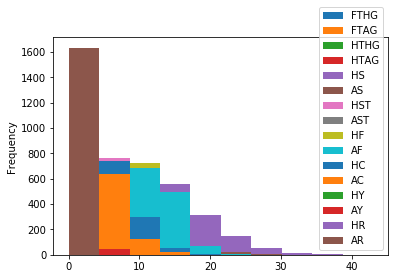

In [8]:
data[data.FTR == 'H'].plot.hist()

In [9]:
data.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [10]:
#WIN RATE FOR THE HOME TEAM
n_matches = data.shape[0] #[0] for X-axis
n_features = data.shape[1] - 1  #[1] for Y-axis (total features - Labels to be determined)

n_homewins = len(data[data.FTR == 'H'])
win_rate = (float(n_homewins)/(n_matches))*100

print("Total no of matches: {}".format(n_matches))
print("Number of Features: {}".format(n_features))
print("Number of matches won by HOME: {}".format(n_homewins))
print("Win rate of HOME team: {}".format(win_rate))

Total no of matches: 3550
Number of Features: 21
Number of matches won by HOME: 1632
Win rate of HOME team: 45.97183098591549


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0a697860>,
      dtype=object)

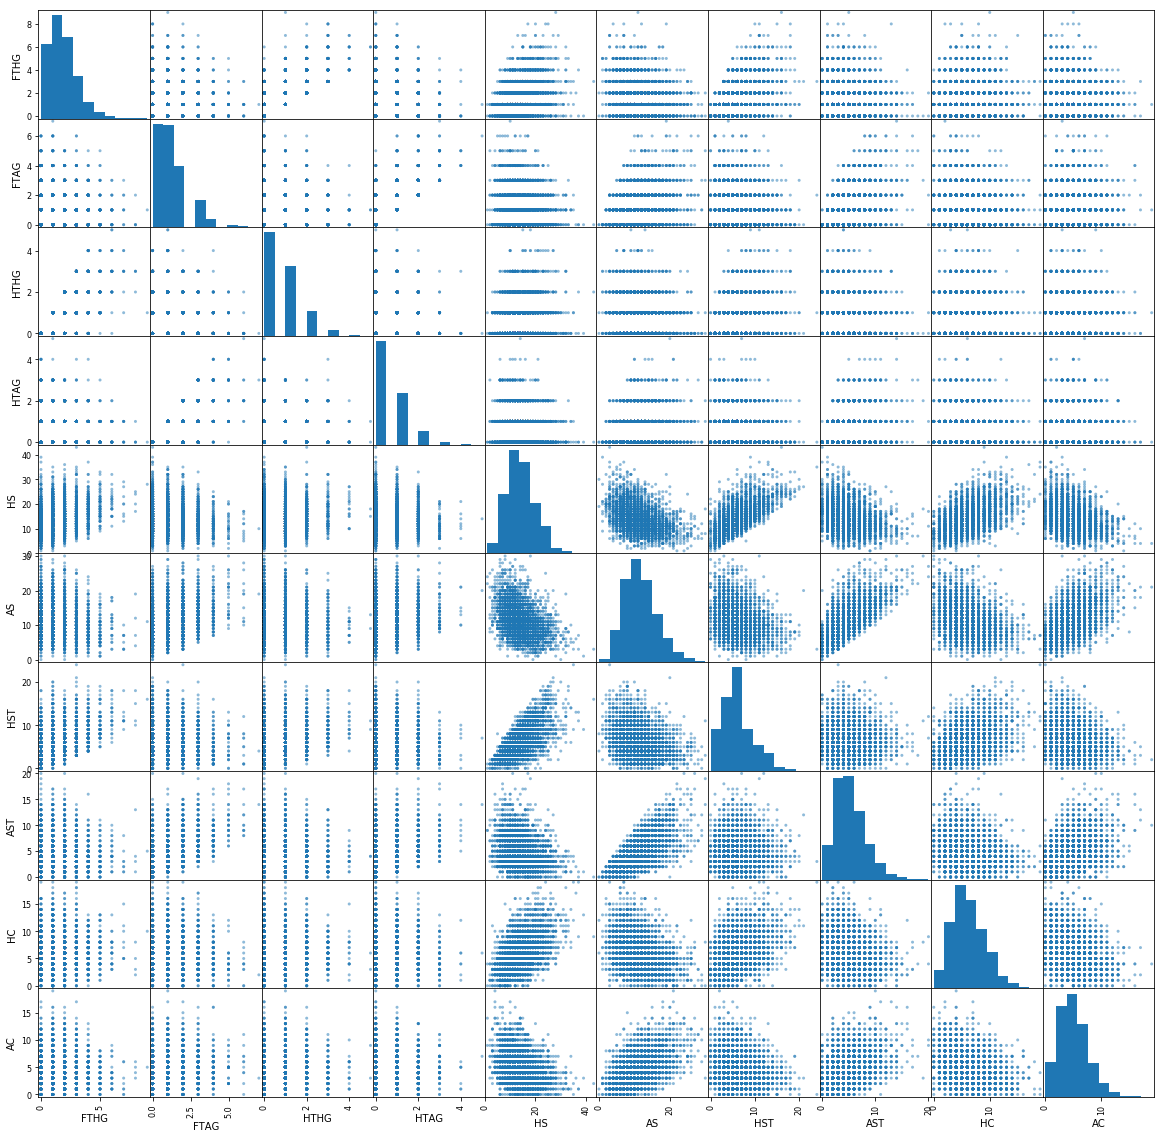

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HC','AC']],figsize=(20,20))

In [12]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = data.drop(['FTR'],1)
y_all = data['FTR']
Z_all = X_all.drop(['Date','HomeTeam','AwayTeam','Referee'],1)

# print(X_all)
# print(y_all)
# print(Z_all)

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HC','AC']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [13]:
#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(Z):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = Z.index)

    # Investigate each feature column for the data
    for col, col_data in Z.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revisedd columns
        output = output.join(col_data)
    
    return output

Z_all = preprocess_features(Z_all)
print ("Processed feature columns ({} total features):\n{}".format(len(Z_all.columns), list(Z_all.columns)))

Processed feature columns (19 total features):
['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR_A', 'HTR_D', 'HTR_H', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']


In [14]:

# Show the feature information by printing the first five rows
print ("\nFeature values:")
display(Z_all.head())


Feature values:


,FTHG,FTAG,HTHG,HTAG,HTR_A,HTR_D,HTR_H,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,2,0,1,1,0,0,11,14,5,7,15,14,4,6,2,2,0,0
1,0,2,0,1,1,0,0,17,8,9,5,12,9,5,4,2,1,0,0
2,0,1,0,1,1,0,0,11,20,3,13,16,10,4,7,2,1,0,0
3,2,1,1,1,0,1,0,26,7,12,3,13,15,12,4,1,2,0,0
4,1,6,0,3,1,0,0,8,15,5,9,11,13,4,9,0,0,0,0


In [15]:
from sklearn.cross_validation import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(Z_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, average='macro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [17]:
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
# clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print ('')
# train_predict(clf_C, X_train, y_train, X_test, y_test)
# print ''

Training a LogisticRegression using a training set size of 3500. . .
Trained model in 0.0690 seconds
Made predictions in 0.0088 seconds.
0.9982907854476673 0.9985714285714286
F1 score and accuracy score for training set: 0.9983 , 0.9986.
Made predictions in 0.0009 seconds.
F1 score and accuracy score for test set: 1.0000 , 1.0000.

Training a SVC using a training set size of 3500. . .
Trained model in 0.8091 seconds
Made predictions in 0.3149 seconds.
0.9907894759502572 0.9917142857142857
F1 score and accuracy score for training set: 0.9908 , 0.9917.
Made predictions in 0.0052 seconds.
F1 score and accuracy score for test set: 0.6552 , 0.7200.



In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
model.predict(X_test)

array(['A', 'H', 'H', 'H', 'A', 'A', 'H', 'A', 'H', 'D', 'D', 'A', 'H',
       'A', 'H', 'D', 'D', 'D', 'H', 'H', 'A', 'A', 'D', 'H', 'H', 'H',
       'A', 'H', 'H', 'H', 'A', 'A', 'D', 'H', 'D', 'H', 'D', 'D', 'H',
       'H', 'D', 'A', 'H', 'H', 'H', 'A', 'D', 'A', 'H', 'D'],
      dtype=object)

In [20]:
model.predict_proba(X_test)

array([[7.37169862e-01, 2.62830134e-01, 3.21769884e-09],
       [1.85513192e-12, 5.59309377e-02, 9.44069062e-01],
       [1.02084114e-12, 7.39384478e-02, 9.26061552e-01],
       [3.08541626e-09, 1.77742599e-01, 8.22257398e-01],
       [7.68381053e-01, 2.31609467e-01, 9.48005847e-06],
       [6.70642039e-01, 3.29353574e-01, 4.38656142e-06],
       [5.02176508e-09, 8.72786598e-02, 9.12721335e-01],
       [7.16600205e-01, 2.83396855e-01, 2.94074263e-06],
       [5.47596326e-06, 2.99274633e-01, 7.00719891e-01],
       [5.32307029e-02, 9.02921726e-01, 4.38475712e-02],
       [9.73327512e-02, 8.64946862e-01, 3.77203866e-02],
       [7.01900920e-01, 2.98093609e-01, 5.47142401e-06],
       [2.47809528e-09, 2.24234832e-01, 7.75765165e-01],
       [8.11195728e-01, 1.88800143e-01, 4.12907608e-06],
       [4.02132446e-09, 1.08940623e-01, 8.91059373e-01],
       [2.54749819e-02, 9.45085766e-01, 2.94392521e-02],
       [1.49292361e-02, 9.62962632e-01, 2.21081324e-02],
       [3.82407314e-02, 9.30175